In [4]:
import os
import torch
import matplotlib.pyplot as plt

# Functions

In [20]:
class ScoreKeeper:
    def __init__(self, base_path, concept, node, seed):
        self.base_path = base_path
        self.concept = concept
        self.node = node
        self.seed = seed
        self.final_path = os.path.join(self.base_path, self.concept, self.node, f"{self.node}_seed{self.seed}/consistency_test")
        self.consistency_score = torch.load(os.path.join(self.final_path, f"seed{self.seed}_scores.bin"))
        self.steps = sorted(list(self.consistency_score.keys()))
        self.final_score = [self.consistency_score[step]['final'] for step in self.steps]
        self.left_score = [self.consistency_score[step]['s_l'] for step in self.steps]
        self.right_score = [self.consistency_score[step]['s_r'] for step in self.steps]
        self.lr_score = [self.consistency_score[step]['s_lr'] for step in self.steps]

    def plot_final(self):
        plt.figure(figsize=(6.4, 4.8))
        plt.title('Consistency Score (Final)')
        plt.plot(self.steps, self.final_score, label=f"{self.concept}/{self.node}/seed_{self.seed}")
        plt.xlabel('Step')
        plt.ylabel('Consistency Score')
        plt.legend()
        plt.show()

    def __str__(self):
        return f"""
Concept: {self.concept}
Node: {self.node}
Seed: {self.seed}
Consistency Score (Final): {self.final_score}
"""

In [27]:
def plot_comparison(score_keeper_list):
    plt.figure(figsize=(6.4, 4.8))
    plt.title('Consistency Score Comparison')
    for score_keeper in score_keeper_list:
        plt.plot(score_keeper.steps, score_keeper.final_score, label=f"{score_keeper.concept}/{score_keeper.node}/seed_{score_keeper.seed}")
    plt.xlabel('Step')
    plt.ylabel('Consistency Score')
    plt.legend()
    plt.show()

# Plotting


Concept: canada_bear
Node: v0
Seed: 111
Consistency Score (Final): [1.537156879901886, 1.6261902451515198, 1.6450912356376648, 1.6271767020225525, 1.6659989953041077, 1.591575264930725, 1.6246531009674072, 1.6144580841064453, 1.6225702166557312, 1.554225742816925]



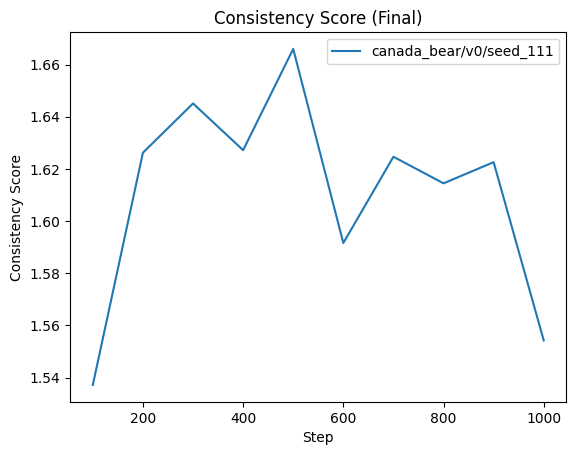

In [25]:
sk1 = ScoreKeeper("/home/jack/Code/Research/inspiration_tree/outputs/",
                   "canada_bear", "v0", 111)
print(sk1)
sk1.plot_final()


Concept: canada_bear
Node: c0
Seed: 111
Consistency Score (Final): [1.530957579612732, 1.6235166192054749, 1.7040807604789734, 1.618195801973343, 1.6257676482200623, 1.5959068834781647, 1.6149482727050781, 1.6158388257026672, 1.643997073173523, 1.6275873184204102]



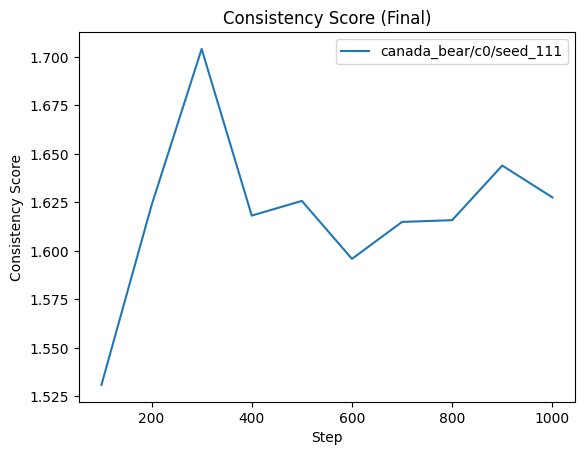

In [26]:
sk2 = ScoreKeeper("/home/jack/Code/Research/inspiration_tree/outputs/",
                   "canada_bear", "c0", 111)
print(sk2)
sk2.plot_final()

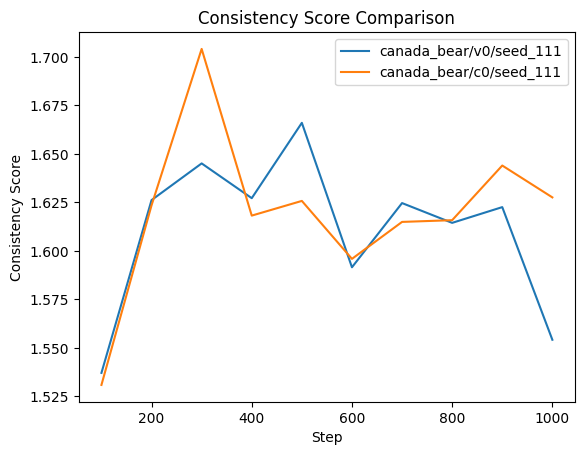

In [28]:
plot_comparison([sk1, sk2])